In [38]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("flights_sample_3m.csv")

In [4]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [5]:
df = df[df['FL_DATE'] >= '2022-09-01']

In [12]:
df = df.select_dtypes(include = ["float64"])

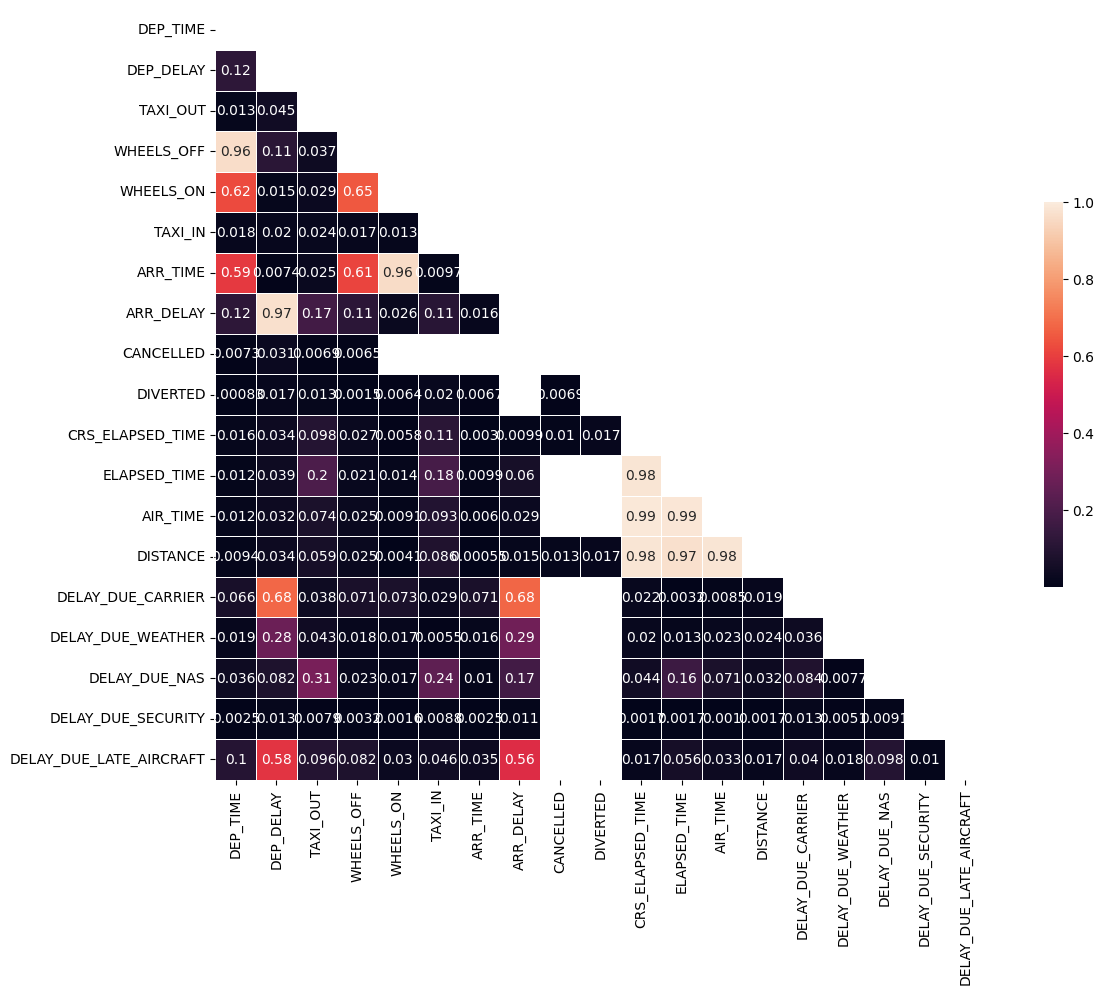

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [27]:
df = df.dropna()

In [28]:
features = df.drop(columns = ["DEP_DELAY"])
target = df["DEP_DELAY"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [30]:
normalizer = MinMaxScaler()

In [31]:
normalizer.fit(X_train)

MinMaxScaler()

In [32]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [33]:
knn = KNeighborsRegressor(n_neighbors=10)

In [34]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [35]:
knn.score(X_test_norm, y_test)

0.9082972931929555

In [40]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [41]:
X_train_reduced = X_train_norm.drop(columns = ["DISTANCE", "AIR_TIME", "CRS_ELAPSED_TIME"])
X_test_reduced = X_test_norm.drop(columns = ["DISTANCE", "AIR_TIME", "CRS_ELAPSED_TIME"])

In [42]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.9269747148646493